# Criando o Modelo com SVM

In [0]:
 # Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving resultado_materias_geral.csv to resultado_materias_geral (3).csv
User uploaded file "resultado_materias_geral.csv" with length 159532 bytes


In [0]:
alunos = pd.read_csv("resultado_materias_geral.csv")

In [6]:
alunos.head()

,discente,periodoano,media_c1,faltas_c1,media_pre,faltas_pre,media_vga,faltas_vga,descricao_c3
0,3d688dbe74a84992ce43181e08c0f295,20151,0.0,0.0,0.0,66.0,0.1,30.0,NÃO PRESENTE
1,6c4acceb9b1288b61d893dc1b5005764,20151,0.0,0.0,5.3,16.0,3.1,0.0,NÃO PRESENTE
2,bb67c2ca87d0e1fcf027b2f0f6df4221,20151,8.5,0.0,9.7,16.0,6.3,0.0,NÃO PRESENTE
3,9897eefc366f1f546e5340390c3df0cd,20151,1.3,0.0,5.0,14.0,1.2,0.0,NÃO PRESENTE
4,859abe9fcb5769f73f54cba6592b81af,20151,1.7,0.0,5.3,2.0,1.3,0.0,NÃO PRESENTE


In [0]:
alunos = alunos[['discente', 'media_c1', 'media_pre', 'media_vga', 'descricao_c3']]

In [0]:
pagando = ['REPROVADO', 'APROVADO POR NOTA', 'APROVADO']
alunos['descricao_c3'] = alunos['descricao_c3'].apply(lambda x: 1 if x in pagando else 0)

In [0]:
# Separando labels e target
X = alunos.iloc[:, 1:4]
y = alunos.iloc[:, 4]

In [0]:
# Separando dados de treino e de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[-0.40330751,  0.36287061, -0.7557553 ],
       [-0.94333605, -0.89933897, -0.89289468],
       [-0.72097136, -0.83111142, -0.65290077],
       ...,
       [-0.94333605, -0.2511773 , -1.06431891],
       [-0.94333605, -1.37693178, -1.03003406],
       [ 0.70851597,  1.07925982,  1.02705664]])

In [0]:
# Fitting SVM to the Training set
#from sklearn.svm import SVC
#classifier = SVC(kernel = 'linear', random_state = 0)
#classifier.fit(X_train, y_train)

In [0]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

classifier = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=1, C=78))
))

In [16]:
classifier.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=78, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [17]:
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

1826    0
1505    0
1993    0
1349    1
781     1
971     1
161     0
1296    0
773     0
2056    0
878     0
775     0
893     0
1610    0
587     0
1844    0
1003    0
1974    0
76      0
501     0
687     0
384     0
654     0
1280    1
1325    0
1872    0
940     0
658     0
1180    0
820     0
427     0
948     1
1921    0
485     0
1909    0
Name: descricao_c3, dtype: int64
[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


## Matrix de Confusão e Taxa de Acerto

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[391  33]
 [ 18  73]]


In [19]:
from sklearn.metrics import accuracy_score
acurracy = accuracy_score(y_test, y_pred)
print ("Acurácia do modelo: " + str(acurracy) + "%.")

Acurácia do modelo: 0.9009708737864077%.


## Plotando o Gráfico

In [0]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show

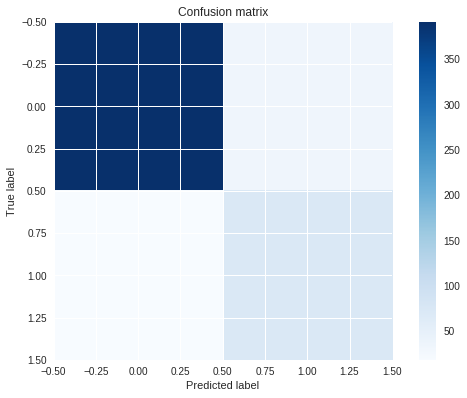

In [21]:
plot_confusion_matrix(cm)

In [22]:
}X1, X2, X3 = np.meshgrid(np.arange(start = cm[:, 0].min() - 1, stop = cm[:, 0].max() + 1, step = 0.01),
                     np.arange(start = cm[:, 1].min() - 1, stop = cm[:, 1].max() + 1, step = 0.01))

SyntaxError: ignored

In [41]:
plt.contourf(alunos, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))

NameError: ignored

In [42]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: ignored